

# Effects of Budget on Movies
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>  The dataset being examined is a set that contains information of about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. This report will look at the variables that are affected by the budget such as popularity, runtime, and revenue. 


In [1]:
import pandas as pd
import numpy as py
import matplotlib.pyplot as plt
%matplotlib inline



<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:

df=pd.read_csv('tmdb-movies.csv')



First we will examine the first five rows to inspect the column headers and overall format of the csv file. Will also use .info code to get general information about the file.

In [3]:
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

We now have a brief glipse as to what the data set looks like and how it is organized. We can gather from the information above that there are 21 columns and 10866 rows in the data set. We can also identify what datatypes are being used for each column. 


Next we will indentify values and properties of that data set that may need to be removed or trimmed.

First we will use the .describe code to get a better look at some of the values.

In [5]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


We see that there are some values that have zero that should not have zero for this case study, such as revenue and budget. We will have to remove these values. 

Next we will identify the total amount of null values in the csv by column.

In [6]:
#   types and look for instances of missing or possibly errant data.
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

There are multiple missing values in the data set. Columns with missing data include 'imdb_id', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'genres', and 'production_companies'. Reasons for the missing values vary. I believe homepage has the most missing values due to many movies not having homepages attached to their films. This is especially true for movies made before the internet era. 

Next I will check if there are any duplicated values

In [7]:
print(df.duplicated().sum())

1


It appears that there is one duplicated value in the data set.



### Data Cleaning 

As mentioned before, this data set has many missing values that need to be dropped. I will drop these values using the following code.

In [8]:
df.dropna(inplace=True)

Next I will check if the values have been removed. If they have, the cell will return an output of False.

In [9]:
df.isnull().sum().any()

False

As you can see the missing values have been removed.

Now we must delete the rows that contain a zero for either budget or revenue.

In [10]:
df = df.loc[~((df['budget'] == 0) | (df['revenue'] == 0))]

To verify the values have been drop i will use the describe code to view the min values of budget and revenue. If the min value is greater than zero, then we have verified that the zeros have been dropped. 

In [11]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1287.000000,1287.000000,1.287000e+03,1.287000e+03,1287.000000,1287.000000,1287.000000,1287.000000,1.287000e+03,1.287000e+03
mean,52557.491064,1.786022,5.200349e+07,1.762444e+08,110.273504,947.266511,6.279487,2007.017094,5.462994e+07,1.991775e+08
std,74450.077163,2.172137,5.514540e+07,2.538156e+08,18.811369,1255.476215,0.795955,8.060503,5.525463e+07,2.968515e+08
min,11.000000,0.010335,1.000000e+00,4.300000e+01,63.000000,10.000000,2.200000,1961.000000,9.693980e-01,4.300000e+01
25%,5851.500000,0.664783,1.400000e+07,2.565097e+07,97.000000,179.000000,5.800000,2005.000000,1.519180e+07,2.764890e+07
50%,20178.000000,1.152354,3.200000e+07,8.208716e+07,107.000000,439.000000,6.300000,2009.000000,3.556927e+07,8.674770e+07
75%,62209.500000,2.125342,7.000000e+07,2.140694e+08,121.000000,1173.000000,6.800000,2011.000000,7.630125e+07,2.351178e+08
max,333348.000000,32.985763,4.250000e+08,2.781506e+09,201.000000,9767.000000,8.300000,2015.000000,4.250000e+08,2.827124e+09


The min values are greater than zero thus the zeros have been dropped. 

Next I will drop the duplicated value identified earlier.

In [12]:
df.drop_duplicates(inplace=True)

And confirm the values have been dropped.

In [13]:
print(df.duplicated().sum())

0


<a id='eda'></a>
## Exploratory Data Analysis





First I will try to get a general idea of the spread of the frequncy amongst all the collumns by creating a histogram for each column. 

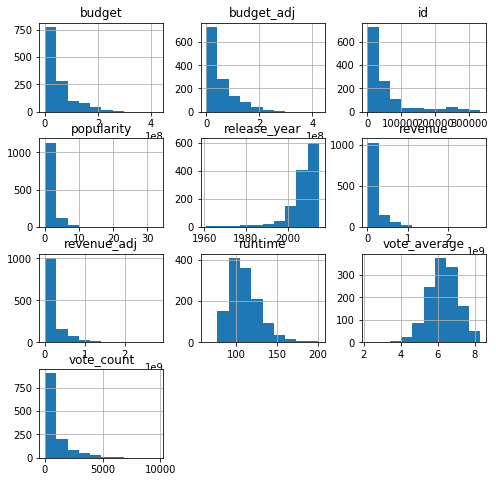

In [14]:
df.hist(figsize=(8,8));

Next I will focus directly at the histogram for the adjusted budget.

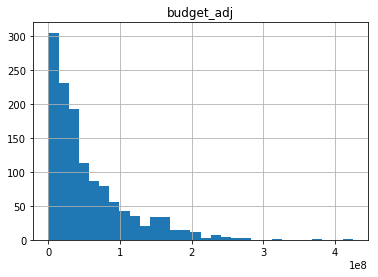

In [15]:
df.hist(column='budget_adj', bins = 30);

It seems that the budget is left skewed with multiple outliers above 150 million. 

Next I will create a box plot to better visualize the data for the budget.

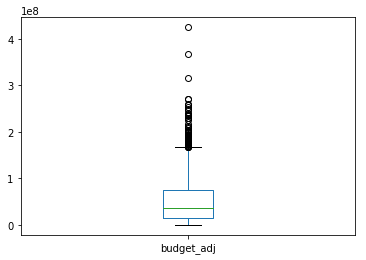

In [16]:
df['budget_adj'].plot(kind='box');

The data shows that indeed there are multiple outliers with most of the data showing the budget to be under 100 million. 

###  Does a larger budget equate to higher popularity?

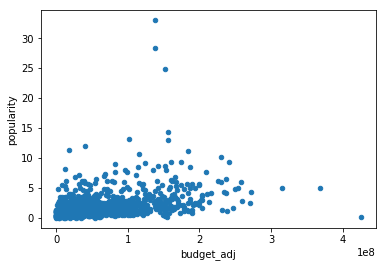

In [17]:
df.plot(x='budget_adj', y='popularity', kind='scatter');

In [18]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
median = df['budget_adj'].median()
low = df.query('budget_adj < {}'.format(median))
high = df.query('budget_adj >= {}'.format(median))

mean_quality_low = low['popularity'].mean()
mean_quality_high = high['popularity'].mean()

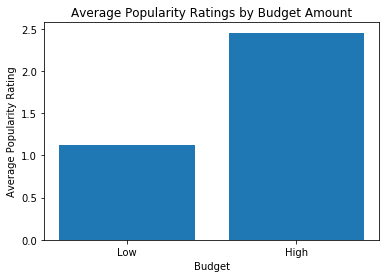

In [19]:
locations = [1, 2]
heights = [mean_quality_low, mean_quality_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Popularity Ratings by Budget Amount')
plt.xlabel('Budget')
plt.ylabel('Average Popularity Rating');

Based on the bar graph and scatter plots above movies with higher budgets seem to garnish higher popularity ratings.

###  Do movies with a higher budget equate to higher revenue?

In [20]:
median = df['budget_adj'].median()
low = df.query('budget_adj < {}'.format(median))
high = df.query('budget_adj >= {}'.format(median))

mean_rev_low = low['revenue_adj'].mean()
mean_rev_high = high['revenue_adj'].mean()

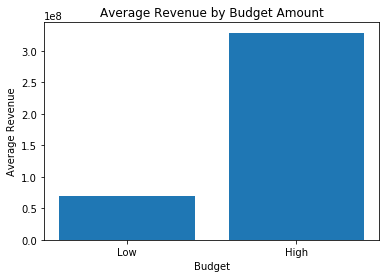

In [21]:
locations = [1, 2]
heights = [mean_rev_low, mean_rev_high]
labels = ['Low', 'High']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Revenue by Budget Amount')
plt.xlabel('Budget')
plt.ylabel('Average Revenue');

From the graph above it is abundantly clear that having a higher budget is very likely to equate to a higher revenue. However, production companies should keep in mind that, although this might the case for movies on average, it is not a gaurenteee that a bigger budget equates to bigger revenue.

###  Do newer movies, on average, have a higher budget than older movies?

In [22]:
median = df['release_year'].median()
Old = df.query('release_year < {}'.format(median))
New = df.query('release_year >= {}'.format(median))

mean_budget_low = low['budget_adj'].mean()
mean_budget_high = high['budget_adj'].mean()

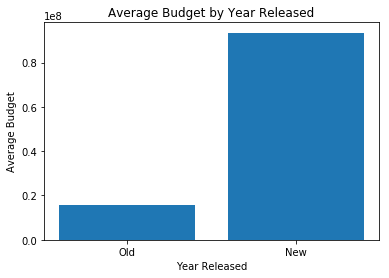

In [23]:
locations = [1, 2]
heights = [mean_budget_low, mean_budget_high]
labels = ['Old', 'New']
plt.bar(locations, heights, tick_label=labels)
plt.title('Average Budget by Year Released')
plt.xlabel('Year Released')
plt.ylabel('Average Budget');

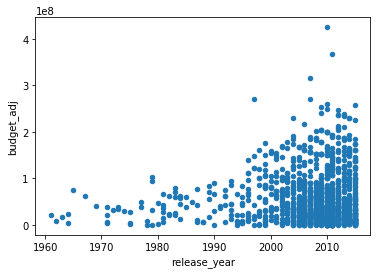

In [24]:
df.plot.scatter(x='release_year', y='budget_adj')

Based on the bar chart and scatter plot newer movies seem to have an extremely larger budget then older movies. However, the movies were seperated into two categories, old and new. They were seperated by the median release year. The movies in this data set are skewed to towards newer release with the oldest year being 1961, the median 2010, and the newest being 2015. Thus this answer may not be as accurate compared to a data set that was equally disrtubeted among release years. Also a reason for newer movies having such a larger budget compared to older movies may be because of the production companies abilty to generate large profits from the many platforms that movies are available today compared to before. 

<a id='conclusions'></a>
## Conclusions



In conlcusion a movies budget is able to tell us alot about the movie itself. It can tell us if a movie is more likely to generate more revenue, have high popularity ratings, or tell us how recent the movie may have been released. Production companies should take this into account when deciding the amount of budget they would like to set for a movie and what their end goal may be. 


### Limitations

Limitations of this analysis inlcude the high amount of outliers that are present in the data set when it comes to the budget and revenue. If the outliers where removed the conclusions such as higher budget equates to higher revenue may need to be reviewed. Also, the data collected is skewed towards more recent movies vs older ones. A more balanced amount of data would help garnish accurate conclusions. Finally, the popularity ratings are debatable depending if they are consumer reviewed or reviewed be renowned critics. 

In [25]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0